### 一
<!-- * PCA  -->
bertopic 主题聚类 $\to$ 因子分析 公因子
* 因子分析（可解释） 5、6个
* 4w $\times$ p matrix
### 分类模型
smote采样/没有采样的
    baseline model
  * 逻辑回归
  * svc
  * DTC
  * RF
    跑一下baseline模型

    进阶模型（我们提出的模型）
  * CNN
共10个模型
### 评价准则
精确率 召回率
* CNN 采样/未采样/sharp value可解释性（可能是较好的）

In [88]:
# 加载模型和数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rd=pd.read_csv(R'E:\code\python_code\BDManager\sunshaolong\model\topic2vec数据_剪枝.csv',index_col=0)
rd.head()

,0_酒廊_服务_朋友_热情,1_泳池_游泳_健身房_健身,2_会议_宴会厅_配合_会场,3_中餐厅_菜品_用餐_包间,4_地铁_火车站_太小_方便,5_水疗_理疗_手法_护理,6_西餐厅_菜品_全味_西餐,7_婚宴_婚礼_宴会厅_富贵,8_下午茶_鸡尾酒_甜点_甜品,9_卫生_设施_方便_服务,...,90_驾驶员_账单_出现_老妈,91_广场_历史_博物馆_艺术,92_聚会_家庭聚会_啤酒_生日歌,93_浴缸_包喝_洗浴_住宿,94_硬件_软件_儿女_插头,95_泳衣_浴袍_提前_好评,96_生日会_生日蛋糕_生日派对_蛋糕,97_必须品_出长_干净_打扫,98_泳池_前卫_大长_久闻,label
0,4.136249e-01,1.227621e-03,1.281602e-03,8.347866e-04,0.091001,8.316647e-04,8.970781e-04,8.773681e-04,4.150610e-03,3.461443e-03,...,2.825562e-03,5.769035e-03,1.070608e-03,2.812345e-03,2.732287e-03,1.746996e-03,1.221256e-03,2.869590e-03,3.006092e-03,1
1,6.267980e-305,2.034716e-307,2.083072e-307,1.618222e-307,1.000000,1.460700e-307,1.678171e-307,1.559862e-307,7.399995e-307,9.063582e-307,...,9.765379e-307,5.228927e-307,1.950237e-307,4.596132e-307,1.100093e-306,2.420902e-307,2.045985e-307,5.300773e-307,3.396540e-307,-1
2,3.997748e-01,1.187408e-03,1.340160e-03,9.517677e-04,0.064602,8.250184e-04,1.003773e-03,9.394463e-04,4.466238e-03,5.606169e-03,...,4.528432e-03,3.962922e-03,1.176409e-03,2.889557e-03,4.741548e-03,1.636420e-03,1.200972e-03,3.411505e-03,2.422122e-03,1
3,3.898120e-01,1.142932e-03,1.311057e-03,9.229806e-04,0.064467,7.879782e-04,9.727967e-04,9.148052e-04,4.326422e-03,5.533704e-03,...,4.479106e-03,3.850912e-03,1.139714e-03,2.807913e-03,4.712344e-03,1.598971e-03,1.157084e-03,3.343902e-03,2.361216e-03,1
4,4.209911e-01,1.162591e-03,1.356378e-03,8.881431e-04,0.035917,7.299915e-04,9.090552e-04,9.508113e-04,4.134103e-03,7.964424e-03,...,9.946066e-03,2.829440e-03,1.084456e-03,3.454303e-03,7.337839e-03,1.591631e-03,1.195651e-03,4.708868e-03,2.179117e-03,1


In [116]:
a=rd.corr()
a[(a>0.5)&(a!=1)].notna().any().value_counts()


False    100
dtype: int64

In [100]:
# 考虑到数据太小了 可以用一下标准化
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df=std.fit_transform(rd.iloc[:,:-1])


In [4]:
## 因子分析 可解释性降维
from factor_analyzer import FactorAnalyzer

在做因子分析之前, 我们需要先做充分性检测, 就是数据集中是否能找到这些factor, 我们可以使用下面的两种方式进行寻找。
* Bartlett's Test

In [101]:
# 载入两个检验
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value,p_value
# p-value=0, 表明观察到的相关矩阵不是一个identity matrix.

(15836.670831296118, 0.0)

* Kaiser-Meyer-Olkin Test(KMO)
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.**(就是kmo值要大于0.6)**

In [102]:
# 导入kmo检验
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)
# 输出大于0.6故通过检验

0.5428711655731674


In [117]:
fa = FactorAnalyzer(20)
fa.fit(df)

ev,v = fa.get_eigenvalues()


<AxesSubplot: xlabel='names'>

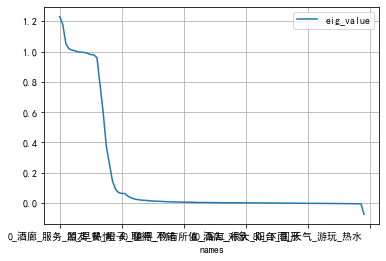

In [94]:
plt.figure
eig_df = pd.DataFrame()
eig_df['names'] = rd.columns[:-1]
eig_df['eig_value'] = v
eig_df.sort_values(by='eig_value', ascending=False, inplace=True)

eig_df.set_index('names').plot(grid=True)

<AxesSubplot: xlabel='factors'>

<Figure size 3000x2400 with 0 Axes>

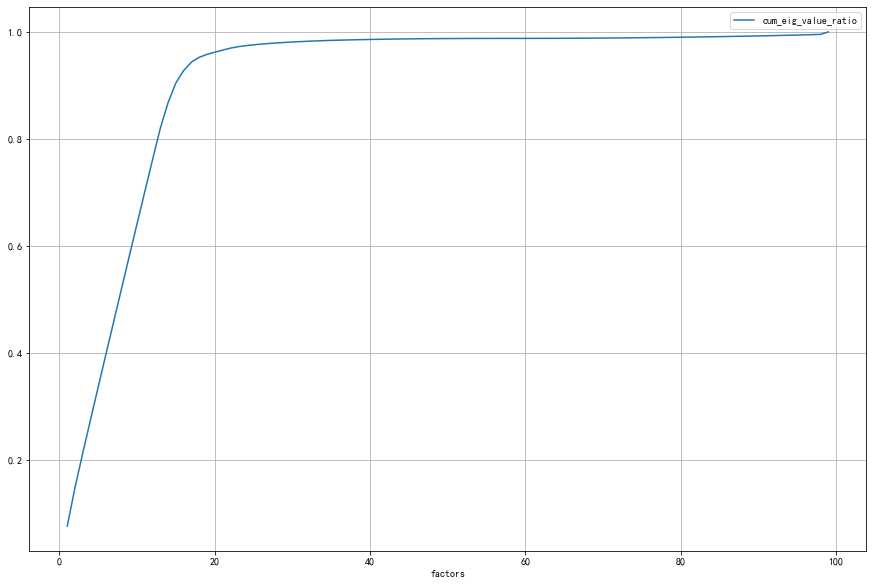

In [118]:
cum_eig_df = pd.DataFrame()
cum_eig_df['factors'] = pd.Series(range(1, 100))
cum_eig_df['cum_eig_value_ratio'] = np.cumsum(np.abs(eig_df['eig_value'].values)) / np.sum(np.abs(eig_df['eig_value'].values))
plt.figure(figsize=(10,8),dpi=300)

# 从累计折线图中可看出当因子个数 150 时, 累计贡献率大于 0.8
cum_eig_df.set_index('factors').plot(grid=True,figsize=(15,10))

* 如果按照累计贡献率来选因子的话，恐怕也是要选150+才能达到贡献率的80%

In [98]:
a=pd.Series(np.cumsum(np.abs(eig_df['eig_value'].values)) / np.sum(np.abs(eig_df['eig_value'].values)))
# print(a.quantile([0.8]))
a[20]
# a[a>=0.01719].shape
# print(a.head())


0.9658722329578259

按照特征值的排序选吧 前80%大的特征值占了57个，剩下接近200个都是后20%小的特征值。

In [53]:
fa.loadings_[0].shape

(10,)

In [62]:
ev.shape

(283,)

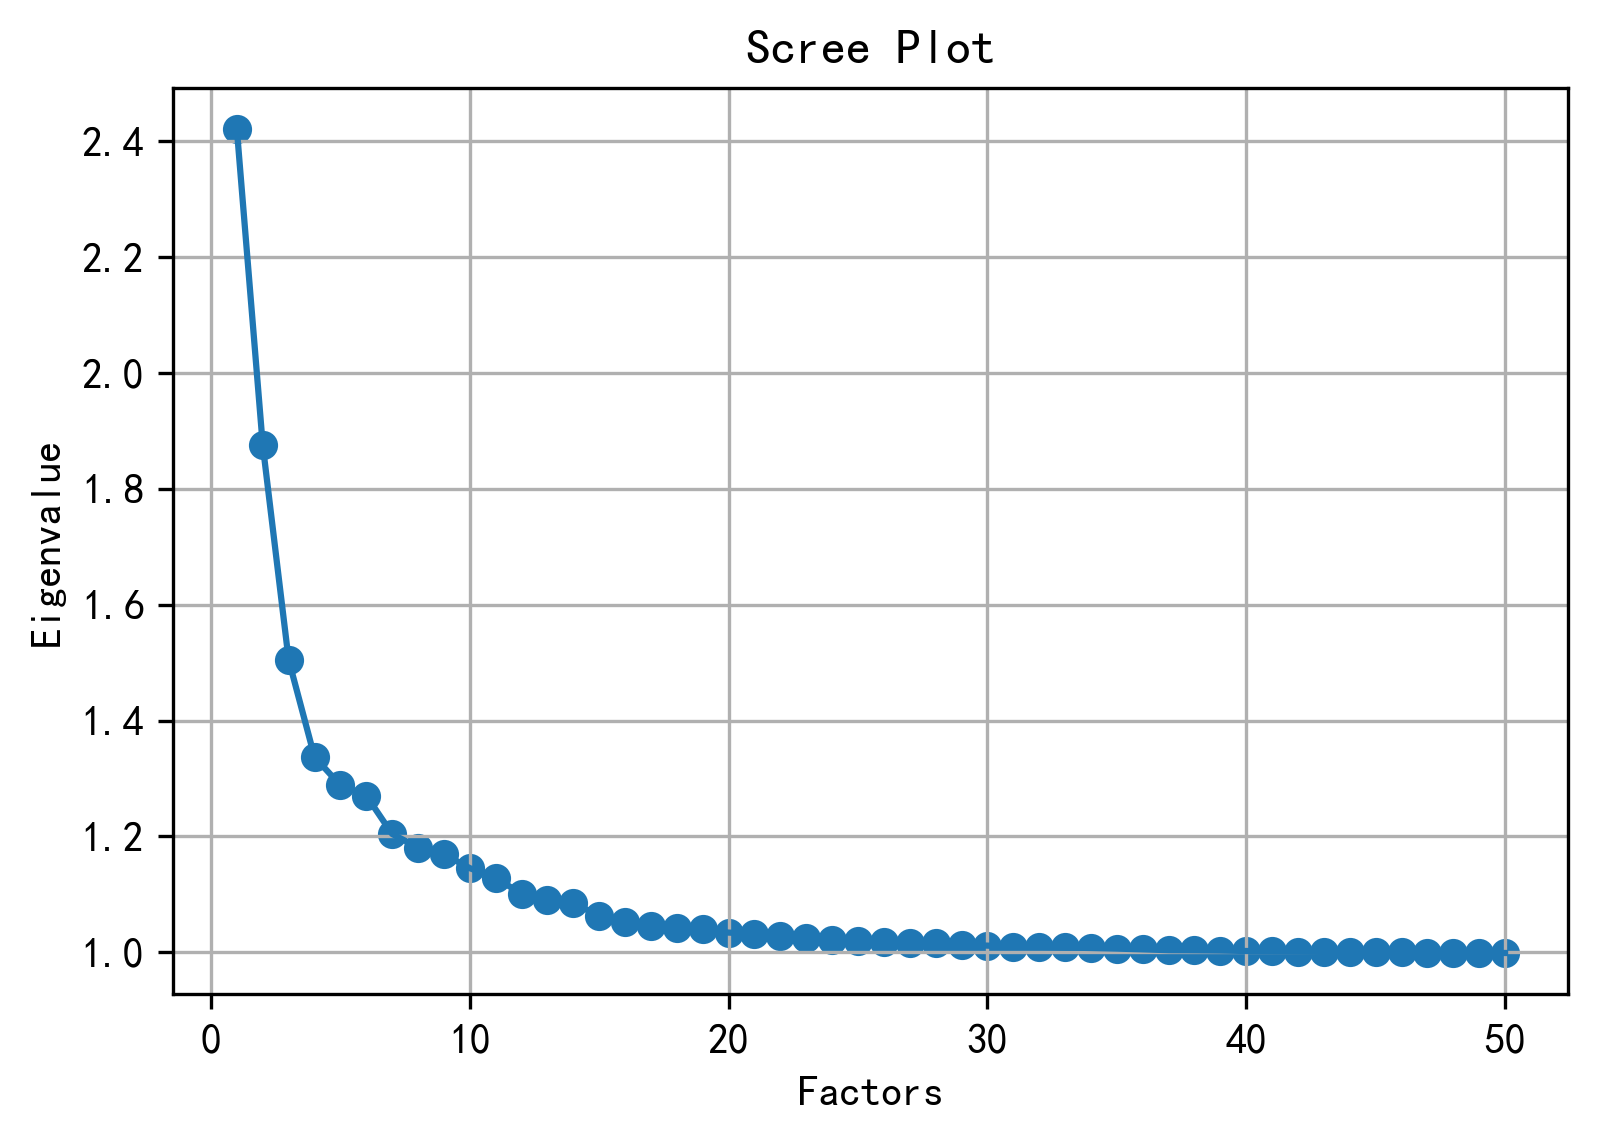

In [55]:
# 可视化
# plot横轴是指标个数，纵轴是ev值
# scatter横轴是指标个数，纵轴是ev值
plt.figure(dpi=300)
plt.scatter(range(1,51),ev[:50])
plt.plot(range(1,51),ev[:50])

plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

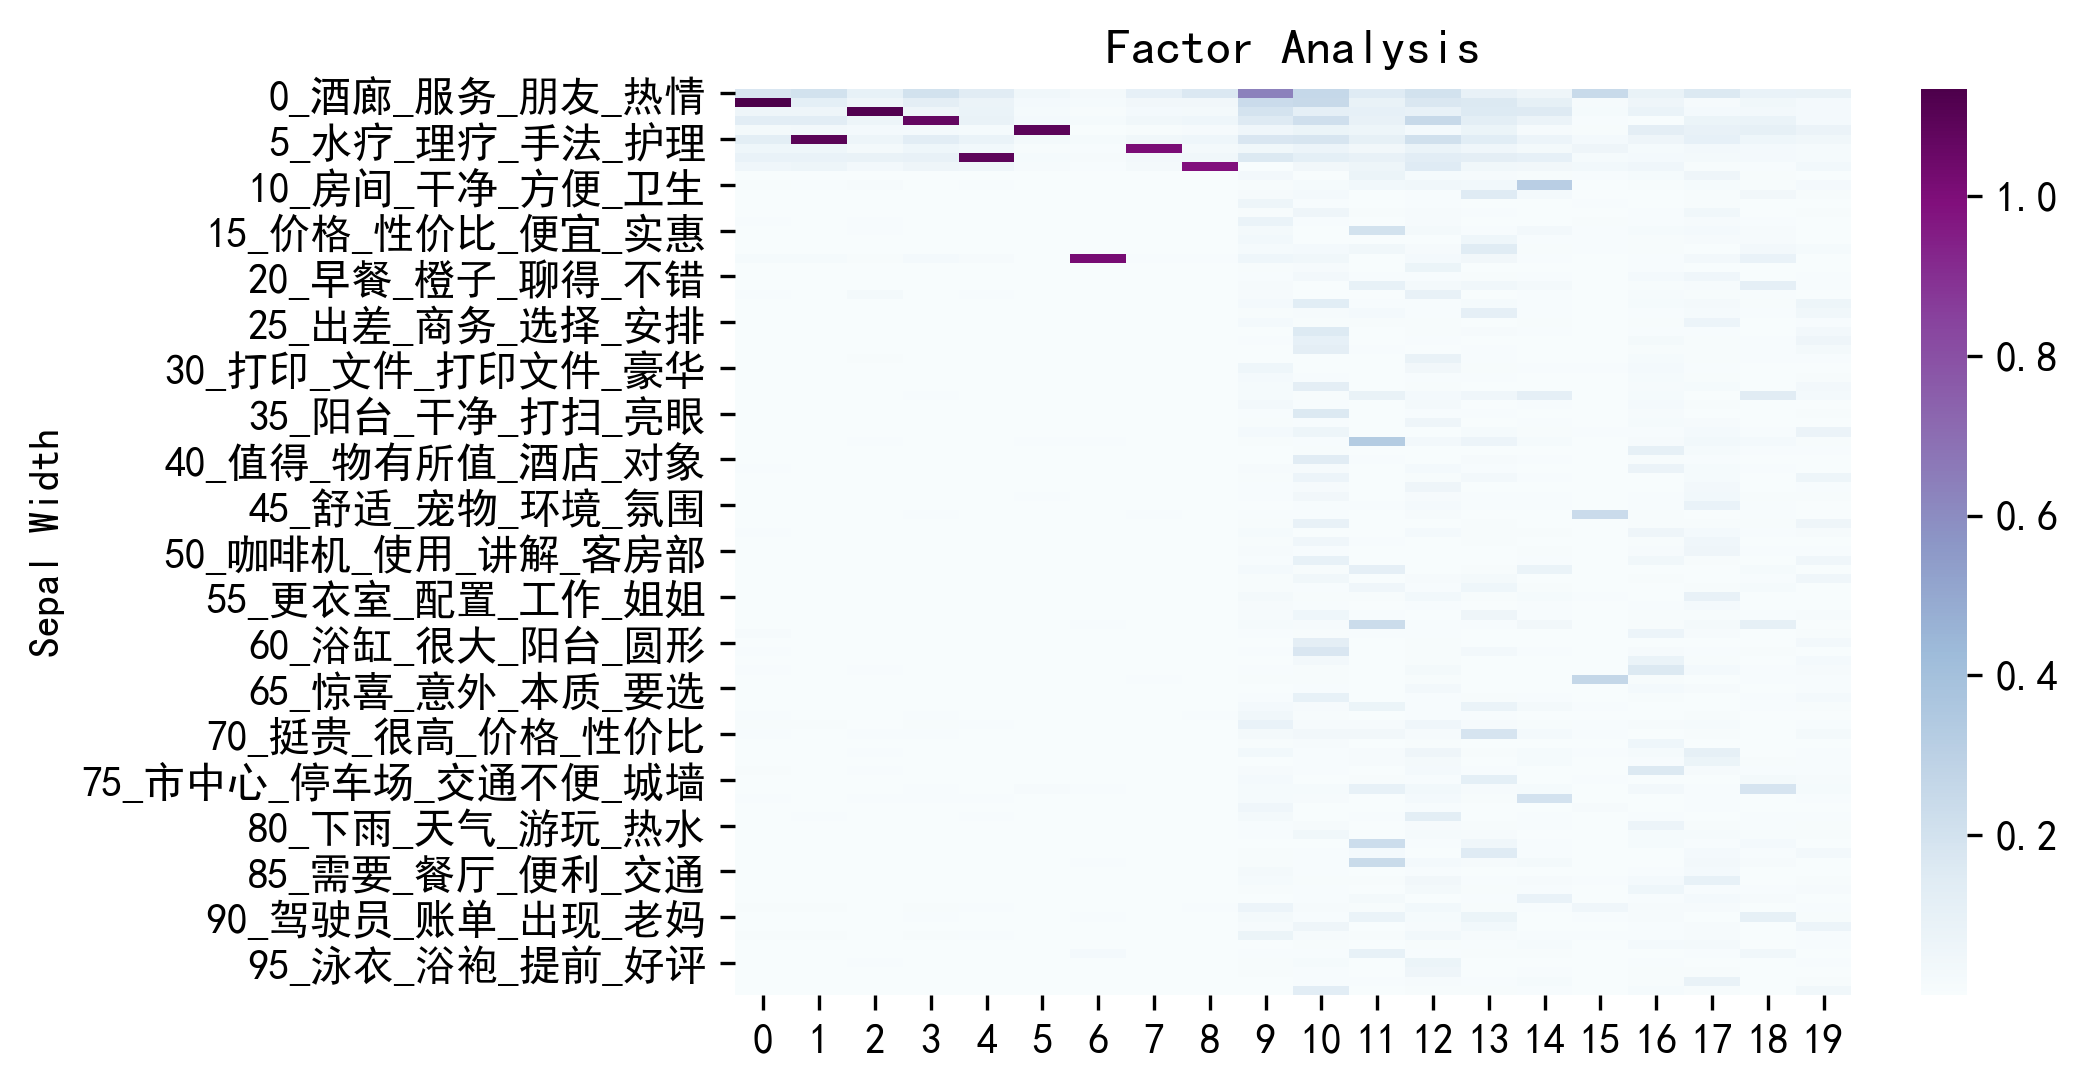

In [119]:
import seaborn as sns
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df_cm = pd.DataFrame(np.abs(fa.loadings_),index=rd.columns[:-1])
plt.figure(dpi=300)
sns.heatmap(df_cm,fmt='.1f',cmap='BuPu')
plt.title("Factor Analysis")
plt.ylabel("Sepal Width")
plt.show()

In [129]:
# 确定因子的名称
X=pd.DataFrame(fa.transform(df),index=rd.index)

In [45]:
from bertopic import BERTopic
topic_model=BERTopic.load('E:\code\python_code\BDManager\sunshaolong\model\中文分词模型2_选择vnal词+标题')

In [51]:
for i in range(8):
    print('话题',i,'\n',topic_model.get_topic(i))

话题 0 
 [('游泳', 0.05118754350748501), ('泳池', 0.04705503002471082), ('健身', 0.0437736942035433), ('健身房', 0.04091705180031966), ('教练', 0.03898997090736744), ('游泳池', 0.02989577182725147), ('水质', 0.025764095535866047), ('指导', 0.01946877808946337), ('中心', 0.01934263356530596), ('水温', 0.017317724630038594)]
话题 1 
 [('感谢', 0.03857180565574591), ('帮助', 0.009475578678115748), ('礼宾', 0.008217915751909834), ('感谢信', 0.007419476973674304), ('经理', 0.0067096113032491704), ('入住', 0.006382636164871559), ('好评', 0.006277240163061321), ('热情服务', 0.005376788811780582), ('介绍', 0.005316339391955533), ('帮忙', 0.0052804494752943945)]
话题 2 
 [('会议', 0.07906504862491501), ('宴会厅', 0.03874459931968705), ('表扬信', 0.02598258364910374), ('配合', 0.025655632009905525), ('会场', 0.025614525054116533), ('举办', 0.022374074465512137), ('富贵', 0.020890241848426336), ('宴会', 0.02046475449057421), ('开会', 0.01929677402674594), ('顺利', 0.017155226610605933)]
话题 3 
 [('西餐厅', 0.10751890510690838), ('菜品', 0.020467359017460458), ('全味', 0.01933

In [131]:
pd.concat([X,rd.iloc[:,-1]],axis=1).to_csv("E:\code\python_code\BDManager\sunshaolong\model\因子分析20维数据.csv")

In [128]:
rd.iloc[:,-1].shape,X.shape

((43142,), (43142, 20))